In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:

file_path = r"C:\Users\palux\Desktop\Курсовая\Основа данные\claster.csv"


df = pd.read_csv(file_path, encoding="utf-8", sep = ';')  # Попробуй encoding="cp1251", если будут проблемы с русским текстом
df =df.rename(columns = {'2024': 'Region'})

# Выведи первые строки для проверки
df = df.dropna()


In [35]:
df_numeric = df[['Количество ДТП с пострадавшими','Число лиц, раненых в ДТП', 'Число лиц, погибших в ДТП','Количество ДТП с пострадавшими']]

In [36]:
df_numeric

,Количество ДТП с пострадавшими,"Число лиц, раненых в ДТП","Число лиц, погибших в ДТП",Количество ДТП с пострадавшими
0,132037.0,164754.0,14403.0,132037.0
1,32936.0,40159.0,3380.0,32936.0
2,1167.0,1555.0,178.0,1167.0
3,500.0,580.0,109.0,500.0
4,1864.0,2458.0,182.0,1864.0
...,...,...,...,...
90,1140.0,1528.0,124.0,1140.0
91,170.0,218.0,23.0,170.0
92,390.0,481.0,67.0,390.0
93,213.0,266.0,22.0,213.0


In [37]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_numeric)

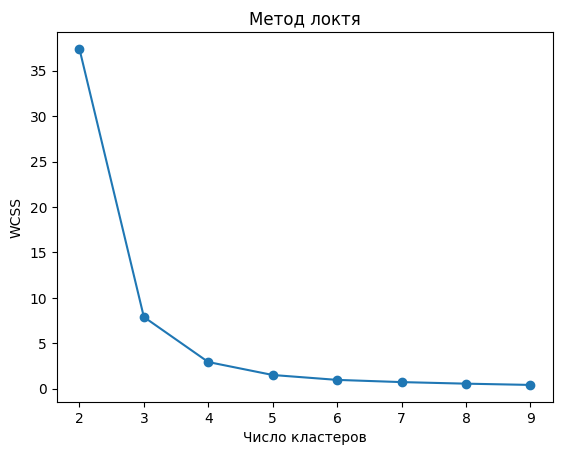

In [38]:
wcss = []
for i in range(2, 10):  # Пробуем от 2 до 10 кластеров
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.title('Метод локтя')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Кластер"] = kmeans.fit_predict(X_scaled)

In [40]:
df_numeric

,Количество ДТП с пострадавшими,"Число лиц, раненых в ДТП","Число лиц, погибших в ДТП",Количество ДТП с пострадавшими
0,132037.0,164754.0,14403.0,132037.0
1,32936.0,40159.0,3380.0,32936.0
2,1167.0,1555.0,178.0,1167.0
3,500.0,580.0,109.0,500.0
4,1864.0,2458.0,182.0,1864.0
...,...,...,...,...
90,1140.0,1528.0,124.0,1140.0
91,170.0,218.0,23.0,170.0
92,390.0,481.0,67.0,390.0
93,213.0,266.0,22.0,213.0


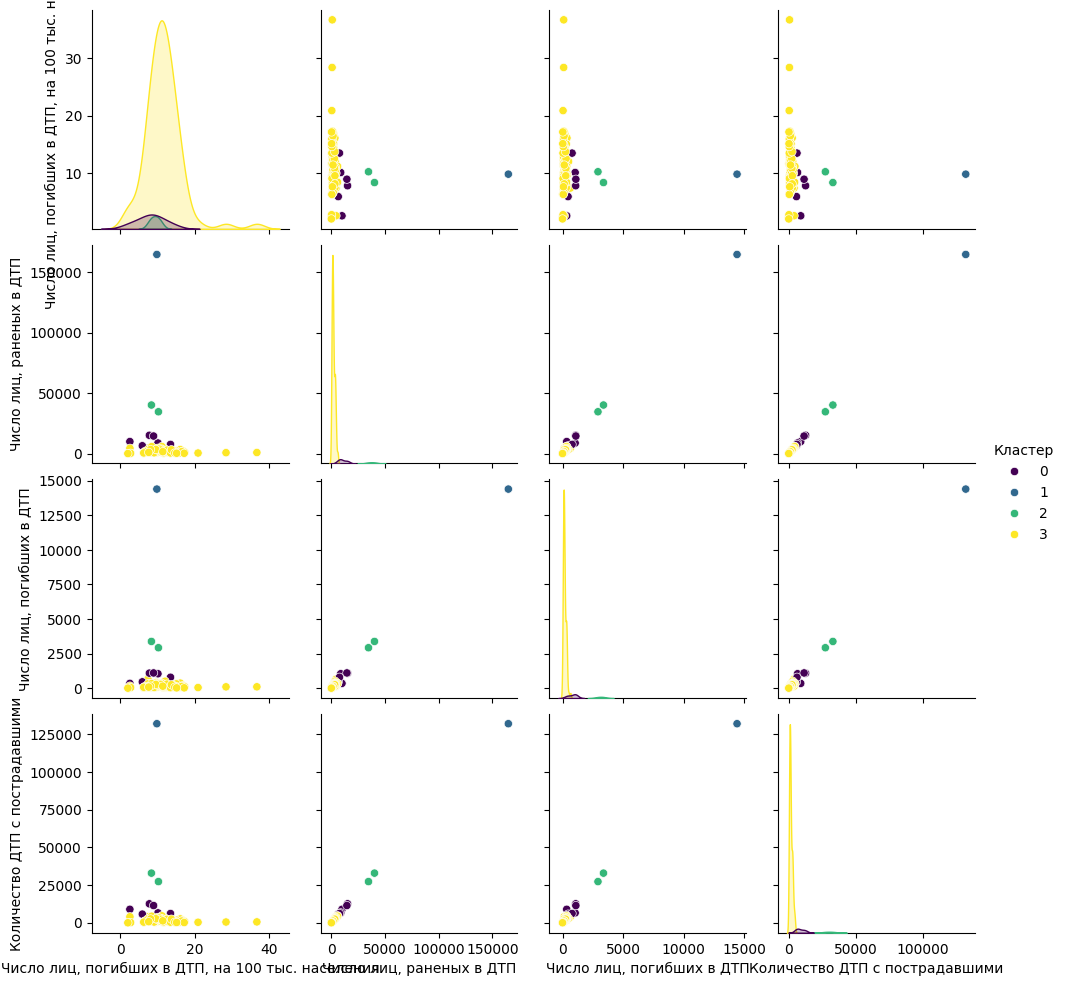

In [45]:
import seaborn as sns
sns.pairplot(df, hue="Кластер", diag_kind="kde", palette="viridis")
plt.show()


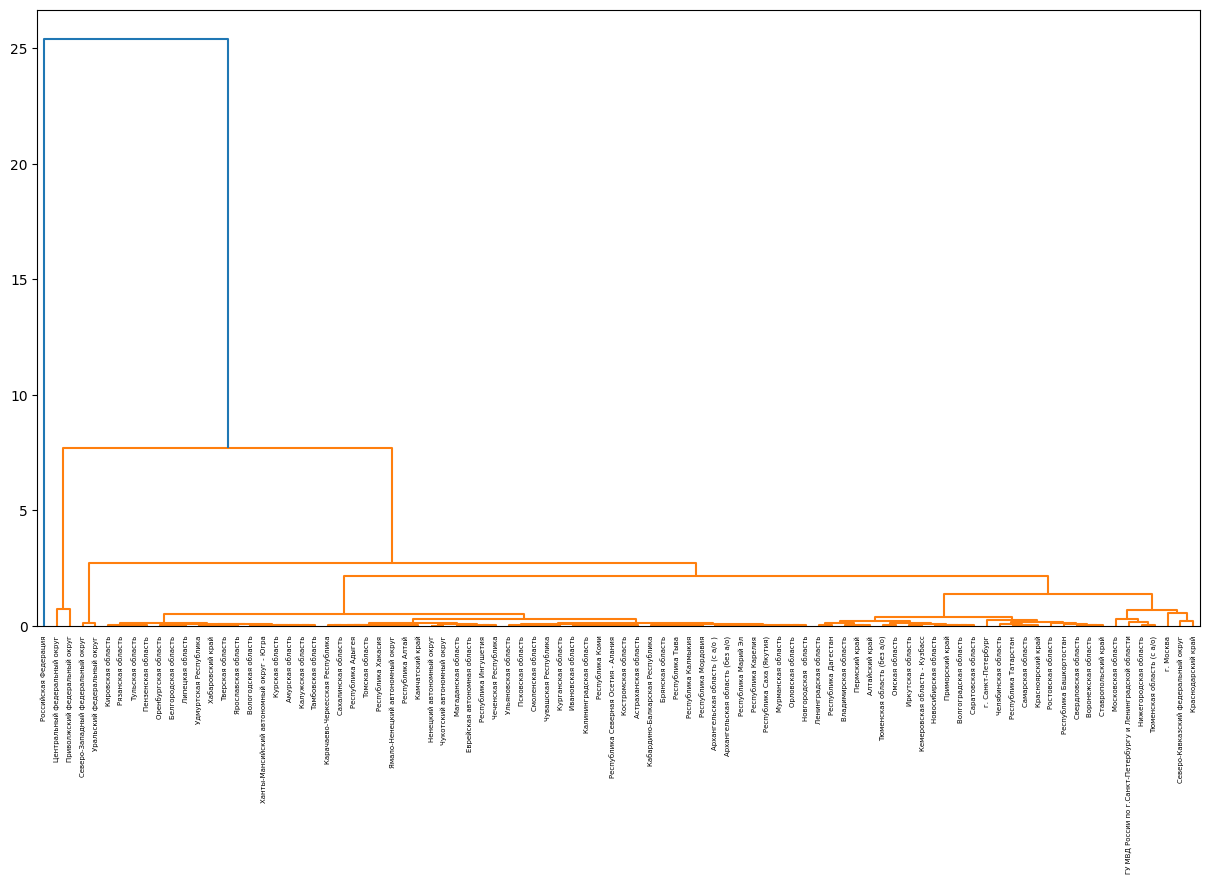

In [42]:


linked = linkage(X_scaled, method='ward')  # Ward – лучший метод для числовых данных

plt.figure(figsize=(15, 8))
dendrogram(linked, labels=df["Region"].values, leaf_rotation=90)
plt.show()


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [170.0, 170.0, 193.75, 193.75],
  [140.0, 140.0, 181.875, 181.875],
  [102.5, 102.5, 160.9375, 160.9375],
  [63.75, 63.75, 131.71875, 131.71875],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [240.0, 240.0, 273.75, 273.75],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [330.0, 330.0, 350.0, 350.0],
  [310.0, 310.0, 340.0, 340.0],
  [256.875, 256.875, 325.0, 32

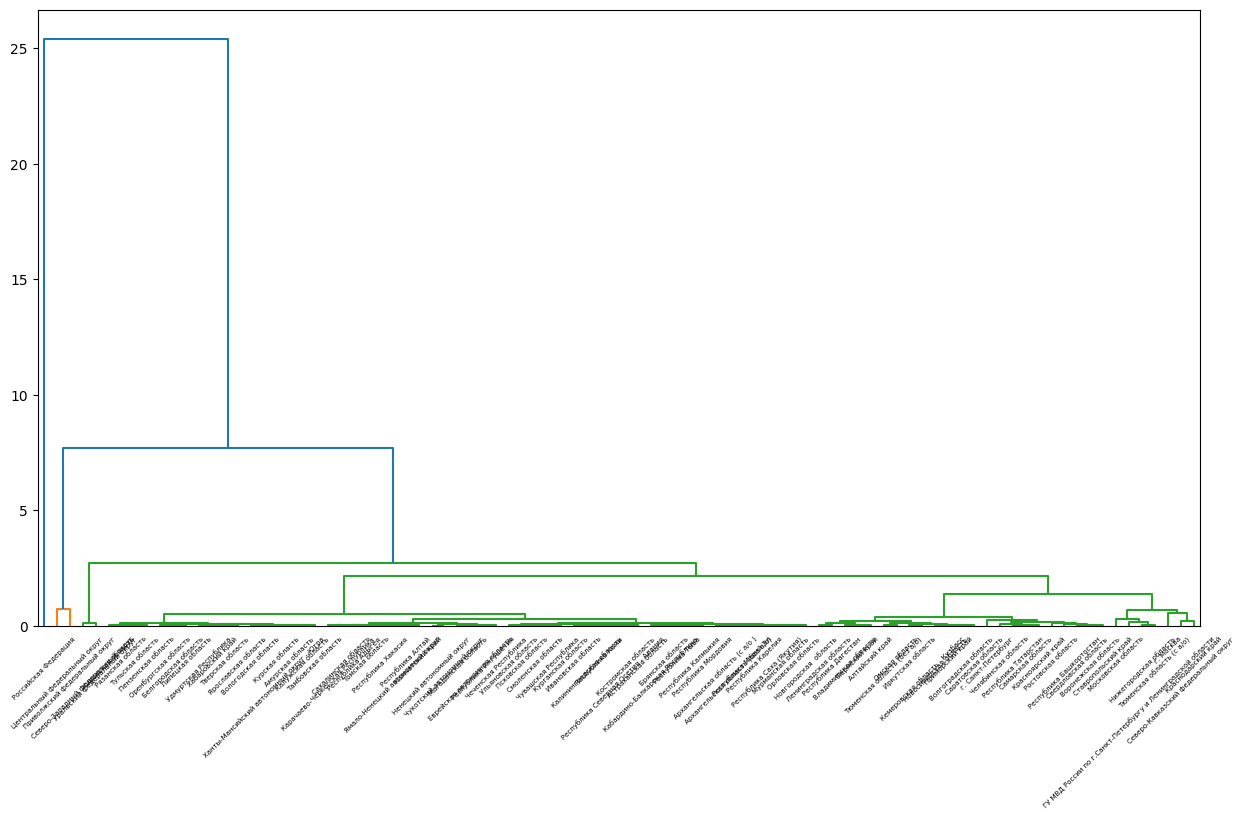

In [43]:
from scipy.cluster.hierarchy import fcluster  
clusters = fcluster(linked, t=5, criterion='distance')  # 5 - число кластеров
plt.figure(figsize=(15, 8))
dendrogram(linked, labels=df["Region"].values, leaf_rotation=45, color_threshold=5)
